# Jamie's Fun Lil' Data Science Diary

### Questions:

* What is an indicator of pneumonia and why?
    * Viral pneumonia on the X-ray is characterized by such a pattern as Ground-glass opacity. Bacterial pneumonia has clear areas of opacity. In our dataset, we have a lot of people with pneumonia.
    * What's the difference between viral and bacterial and why do they look different on the scans?
    * How are we gonna deal with class imbalance?
    
* Are computers already being used to do this work for doctors?

* Facts/figures
    * Pneumonia is the world's leading killer of children under 5
    
* How can we verify the safety of using these models as opposed to experts? Have there been instances where the model was right and the expert was wrong?

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
import os

In [11]:
# Source Code: https://www.kaggle.com/dmitriyveselov/first-simple-keras-cnn-88-90-accuracy-chest-xray

base_dir='../data/chest_xray/'
train_pneumonia=os.listdir('../data/chest_xray/train/PNEUMONIA/')
train_normal=os.listdir('../data/chest_xray/train/NORMAL/')
val_dir_normal=os.listdir('../data/chest_xray/val/NORMAL/')
test_dir_normal=os.listdir('../data/chest_xray/test/NORMAL/')
val_dir_pneumonia=os.listdir('../data/chest_xray/val/PNEUMONIA/')
test_dir_pneumonia=os.listdir('../data/chest_xray/test/PNEUMONIA/')

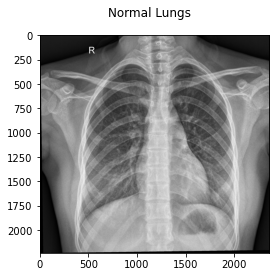

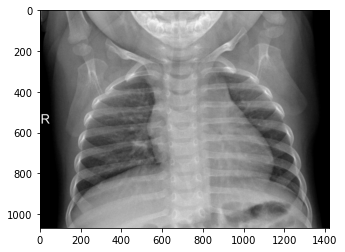

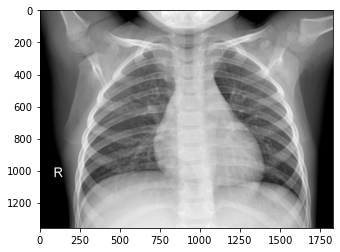

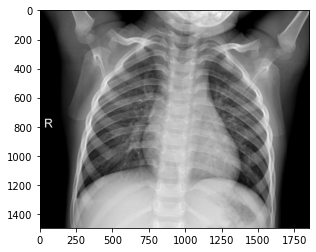

In [13]:
from keras.preprocessing.image import ImageDataGenerator, load_img
plt.suptitle('Normal Lungs')
for i in range(0,4):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    plt.imshow(img)
    plt.show()

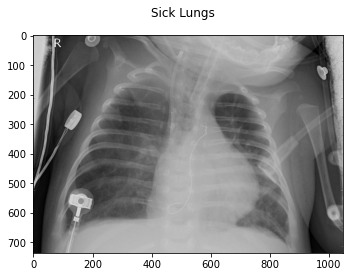

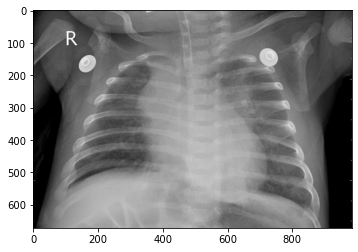

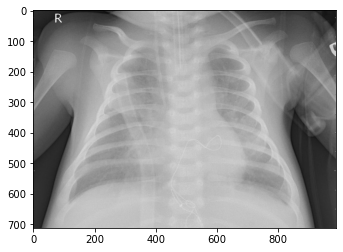

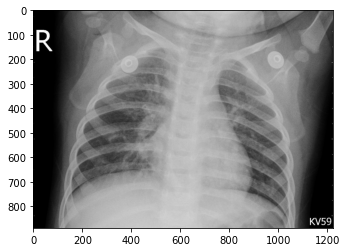

In [15]:
plt.suptitle('Sick Lungs')
for i in range(0,4):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    plt.imshow(img)
    plt.show()

<AxesSubplot:>

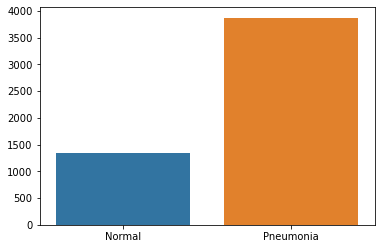

In [17]:
sns.barplot(x=['Normal','Pneumonia'],y=[len(train_normal),len(train_pneumonia)])

In [27]:
model = Sequential()

In [42]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=0.4,
                                   zoom_range=0.4
                                 )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                                 target_size=(224, 224),
                                                 batch_size=50,
                                                 class_mode='binary')

val_set = train_datagen.flow_from_directory('../data/chest_xray/val/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=50,
                                            class_mode='binary')

test_set = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                            target_size=(224, 224),
                                            batch_size=50,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['categorical_accuracy'])


In [37]:
from keras.layers import Dense, Dropout, Flatten

In [45]:
model.add(Flatten())

In [46]:
training_set.image_shape

(224, 224, 3)

In [47]:
history = model.fit_generator(training_set,
                    epochs=10,
                    validation_data=test_set)

Epoch 1/10
105/105 [==============================] - 182s 2s/step - loss: 1.2972 - categorical_accuracy: 0.0037 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
105/105 [==============================] - 178s 2s/step - loss: 1.2799 - categorical_accuracy: 0.0022 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
105/105 [==============================] - 193s 2s/step - loss: 1.3062 - categorical_accuracy: 9.3743e-04 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
105/105 [==============================] - 190s 2s/step - loss: 1.2947 - categorical_accuracy: 0.0014 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
105/105 [==============================] - 175s 2s/step - loss: 1.2670 - categorical_accuracy: 0.0026 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
105/105 [==============================] - 176s 2s/step - loss: 1.2883 - categorical_accuracy: 0.0022 - val_loss: 1.2483 - val_cat

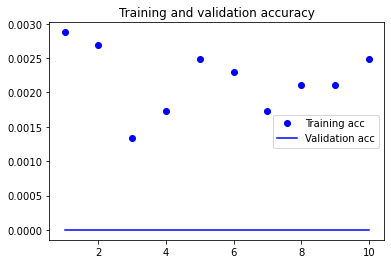

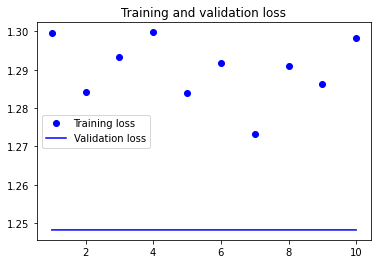

In [49]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss'
        )
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()